In [0]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/',force_remount=True)
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
my_image = path+"my_pic.png"
mat_contents = sio.loadmat(dataset)
#print(mat_contents)
images = mat_contents['images']
label = mat_contents['C']
print('Shape:',images.shape)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Shape: (50, 3072)


In [0]:
import numpy as np 
images= np.transpose(images)
print(images.shape)
im = np.reshape(images, [ 32, 32, 3, -1], order="F")
print(im.shape)

(3072, 50)
(32, 32, 3, 50)


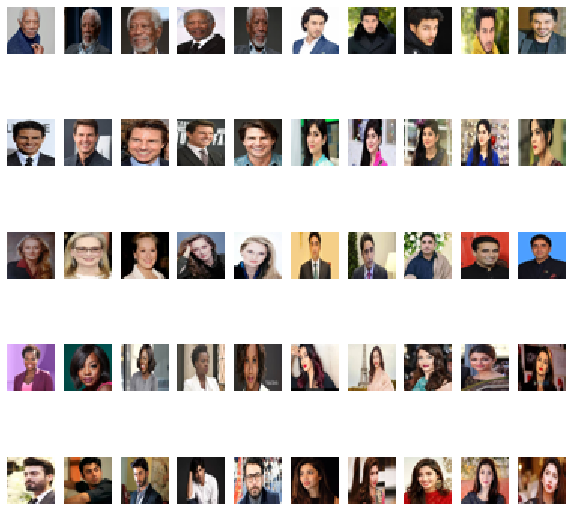

In [0]:
from matplotlib import pyplot as plt
import cv2
#Print all images
k = 0
fig, axis = plt.subplots(5,10,figsize=(10,10))
for i in range(5):
  for j in range(10):
    axis[i,j].imshow(im[:,:,:,k])
    k += 1
    axis[i,j].axis("off")
    
#Print nth image
#n = 10
#plt.imshow(im[:,:,:,n])
#print(im[:,:,:,n].shape)

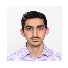

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original image shape:  (498, 496, 4)


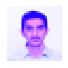

Re-sized image shape:  (32, 32, 3)
Re-shaped image dimension:  (3072,)


In [0]:
from scipy import misc
from math import sqrt
from numpy import ndarray
from google.colab.patches import cv2_imshow
from scipy.ndimage import zoom
from pylab import rcParams
rcParams['figure.figsize'] = 1, 1

#Read your image here
path_image = path+"my_pic.png"
my_img = plt.imread(path_image)
plt.imshow(my_img)
plt.axis("off")
plt.show()
print("Original image shape: ",my_img.shape)


#Resize your image
scale_factor = 32 / 496 
height = int(my_img.shape[0] * scale_factor)
width = int(my_img.shape[1] * scale_factor)
dim = (width, height)
resized_img = cv2.resize(my_img, dim,interpolation = cv2.INTER_AREA)
resized_img = zoom(resized_img, (1, 1, 3/4))
plt.imshow(resized_img)
plt.axis("off")
plt.show()
print("Re-sized image shape: ",resized_img.shape)

"""

#Resize image Method 2
resized_img2 = zoom(my_img, (32/496, 32/496, 3/4))
plt.imshow(resized_img2,vmin=0, vmax=255)
plt.axis("off")
plt.show()
print("Method 2 resized image shape: ",resized_img2.shape)

#Comparing with one of the images in dataset
plt.imshow(im[:,:,:,10])
plt.axis("off")
plt.show()
print("Image shape: ",im[:,:,:,10].shape)

"""

#Reshape your image as we reshape the image of dataset
reshaped_img = np.reshape(resized_img, [ 32, 32, 3, -1], order="F")
reshaped_img = np.reshape(reshaped_img,[-1], order="F")
print("Re-shaped image dimension: ",reshaped_img.shape)

#Calculate Eucleadian distance between your image and dataset 
dist_euc = []
#Reshape all images to 1-d arrays/ vectors
for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F") 
    dist_euc.append(sum(np.square(G - reshaped_img))) #Append least squares distance to list
#print(dist_euc)

In [0]:
from heapq import nsmallest
def k_Nearest_Neighbors(k,diff):
  #Returns k images with the smallest euclidean distance calculated
  #Input k and diff (list of the least square differences between given 50 images and test image)
  print("Displaying",k,"closest images: \n\n")
  smallest_n = nsmallest(k, diff)
  for i in range(len(smallest_n)):
     n = diff.index(smallest_n[i])
     plt.imshow(im[:,:,:,n])
     plt.axis("off")
     plt.show()
  

Displaying 1 closest images: 




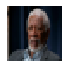

In [0]:
#Write code for 1 NN
k_Nearest_Neighbors(1,dist_euc)

Displaying 3 closest images: 




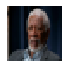

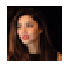

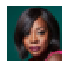

In [0]:
#3 NN
#Write code for 3 NN
k_Nearest_Neighbors(3,dist_euc)


Displaying 5 closest images: 




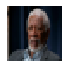

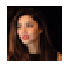

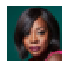

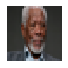

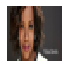

In [0]:
#5 NN
#Write code for 5 NN
k_Nearest_Neighbors(5,dist_euc)
    

Testing the authenticity of results by using a random picture of celebrities and see if the program can detect them or not. 


In [0]:
def test_program(file_name):
    #Input file name
    #Outputs a least square difference list between all images and selected image
    
    #set path
    test_image = path+file_name
    #read image
    test_img = plt.imread(test_image)
    plt.imshow(test_img)
    plt.axis("off")
    plt.show()
    print("Test image shape: ",test_img.shape)
    s = test_img.shape
    #resize image
    resized_test_img = zoom(test_img, (32/s[0], 32/s[1], 3/s[2]))
    plt.imshow(resized_test_img)
    plt.axis("off")
    plt.show()
    print("Resized Test image shape: ",resized_test_img.shape)

    #reshape to 1-d array
    reshaped_test_img = np.reshape(resized_test_img, [ 32, 32, 3, -1], order="F")
    reshaped_test_img = np.reshape(reshaped_test_img,[-1], order="F")

    #compute euclidean distance between test image and dataset
    test_euc_dist = []
    for i in range(50):
        G = im[:,:,:,i]
        G = np.reshape(G,[-1], order="F") 
        test_euc_dist.append(sum(np.square(G - reshaped_test_img))) #Append least squares distance to list
    #print(test_euc_dist)
    return test_euc_dist


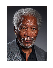

Test image shape:  (3600, 2620, 3)


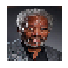

Resized Test image shape:  (32, 32, 3)
Displaying 1 closest images: 




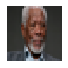

In [0]:
rcParams['figure.figsize'] = 1, 1

#Test 1: Celebrity Morgan Freeman
test_euc_dist = test_program("Morgan-Freeman.jpg")
#using kNN to predict closest images k=3
k_Nearest_Neighbors(1,test_euc_dist)


Even though the program guesses the correct celebrity, we can see that the program has its shortcomings mainly because of the dominance of the background color in images.
This issue has not been addressed in this program.

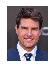

Test image shape:  (1440, 1080, 3)


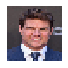

Resized Test image shape:  (32, 32, 3)
Displaying 1 closest images: 




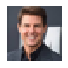

In [0]:
#Test 2: Celebrity Tom Cruise
test_euc_dist = test_program("Tom-Cruise.jpg")
k_Nearest_Neighbors(1,test_euc_dist)

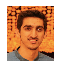

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test image shape:  (528, 448, 4)


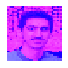

Resized Test image shape:  (32, 32, 3)
Displaying 3 closest images: 




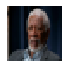

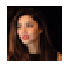

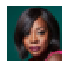

In [0]:
#Which celebrity do i resemble
test_euc_dist = test_program("my_image.png")
k_Nearest_Neighbors(3,test_euc_dist)

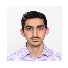

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test image shape:  (498, 496, 4)


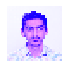

Resized Test image shape:  (32, 32, 3)
Displaying 5 closest images: 




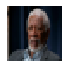

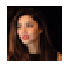

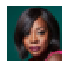

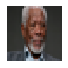

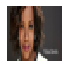

In [0]:
#Which celebrity do i resemble
test_euc_dist = test_program("my_pic.png")
k_Nearest_Neighbors(5,test_euc_dist)

Consistent results with different images!